## Human-assisted Distance Metric Learning on a Synthetic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

#### Generate random data

In [2]:
def generate_random_data(m, n):
    np.random.seed(0)
    x1 = np.random.uniform(-2, 2, (m, 1))
    x2 = np.random.uniform(-2, 2, (m, 1))
    X = np.random.uniform(-2, 2, (m, n-2))
    X = np.hstack((x1, x2, X))
    epsilon = np.random.randn(m)
    X = pd.DataFrame(X)
    y = (X[0] + X[1] + epsilon) > 0
    return X, y

X, y = generate_random_data(100, 3)
print X.shape
X.head()

(100, 3)


,0,1,2
0,0.195254,0.711266,-0.752816
1,0.860757,-0.919968,0.785374
2,0.411054,0.940776,-0.488993
3,0.179533,1.848754,-1.281585
4,-0.305381,-1.004987,-1.901285


In [3]:
y.tail()

95    False
96    False
97    False
98    False
99    False
dtype: bool

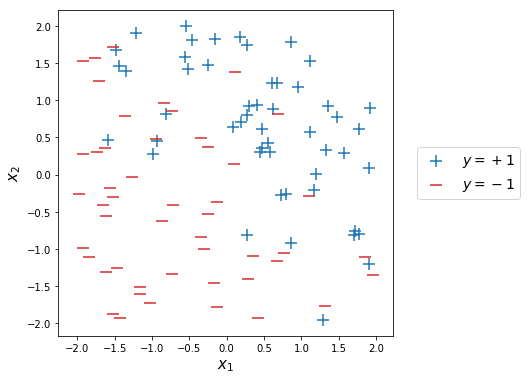

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X.loc[y == True, 0], X.loc[y == True, 1], color='C0', marker='+', s=150, label='$y = +1$')
plt.scatter(X.loc[y == False, 0], X.loc[y == False, 1], color='C3', marker='_', s=150, label='$y = -1$')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend(fontsize=14, bbox_to_anchor=(1.05, 0.5), loc="center left")

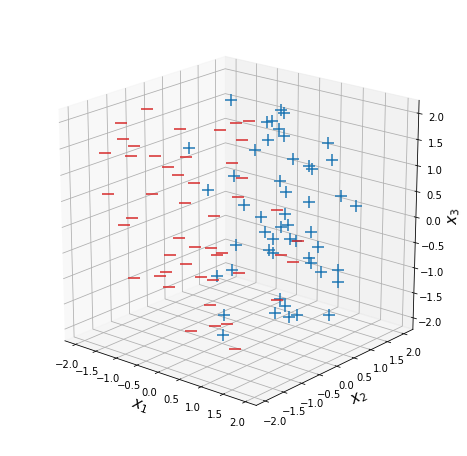

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.loc[y == True, 0], X.loc[y == True, 1], X.loc[y == True, 2], depthshade=False, 
           color='C0', marker='+', s=150, label='$y = 1$')
ax.scatter(X.loc[y == False, 0], X.loc[y == False, 1], X.loc[y == False, 2], depthshade=False, 
           color='C3', marker='_', s=150, label='$y = -1$')
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3$', fontsize=15)
ax.view_init(20, -50)

#### k Nearest Neighbor Classification

In [6]:
def get_distance_matrix(X, metric_weights):
    m = X.shape[0]
    dist_matrix = np.zeros((m, m))
    for i in range(m):
        for j in range(i):
            x_i, x_j = X.loc[i].values, X.loc[j].values
            # d(x, y) = sqrt((x - y).T * A * (x - y))
            dist_i_j = (x_i - x_j).dot(metric_weights).dot(x_i - x_j)
#             dist_i_j = np.sum(metric_weights.dot((x_i - x_j) ** 2)) ** 0.5
            dist_matrix[i, j] = dist_i_j
            dist_matrix[j, i] = dist_i_j
    return dist_matrix

def kNN_loocv(dist_matrix, y, k):
    m = y.shape[0]
    misclassification_errors = []
    for i in range(m):
        # 1:k+1 to avoid using the query instance for prediction
        k_nearest_neighbor_indices = np.argsort(dist_matrix[i])[1:k+1]
        k_nearest_neighbor_responses = y[k_nearest_neighbor_indices]
        pred = k_nearest_neighbor_responses.mode().values[0]
        misclassification_errors.append(pred != y[i])
    mean_misclassification_error = np.mean(misclassification_errors)
    return mean_misclassification_error

X, y = generate_random_data(100, 2)
k = 5
euclidean_metric_weights = np.diag(np.ones(X.shape[1]))
dist_matrix = get_distance_matrix(X, euclidean_metric_weights)
error = kNN_loocv(dist_matrix, y, k)
print "Misclassification error:", error

Misclassification error: 0.24


In [7]:
m = 100
N = [2, 10, 100, 1000]
errors_over_n = []
for n in N:
    X, y = generate_random_data(m, n)
    k = 5
    euclidean_metric_weights = np.diag(np.ones(X.shape[1]))
    dist_matrix = get_distance_matrix(X, euclidean_metric_weights)
    error = kNN_loocv(dist_matrix, y, k)
    errors_over_n.append(error)
errors_over_n

[0.24, 0.32, 0.39, 0.42]

In [8]:
M = [1000, 100, 10]
n = 100
errors_over_m = []
for m in M:
    X, y = generate_random_data(m, n)
    k = 5
    euclidean_metric_weights = np.diag(np.ones(X.shape[1]))
    dist_matrix = get_distance_matrix(X, euclidean_metric_weights)
    error = kNN_loocv(dist_matrix, y, k)
    errors_over_m.append(error)
errors_over_m

[0.351, 0.39, 0.4]

Text(0.5,0,'Number of samples')

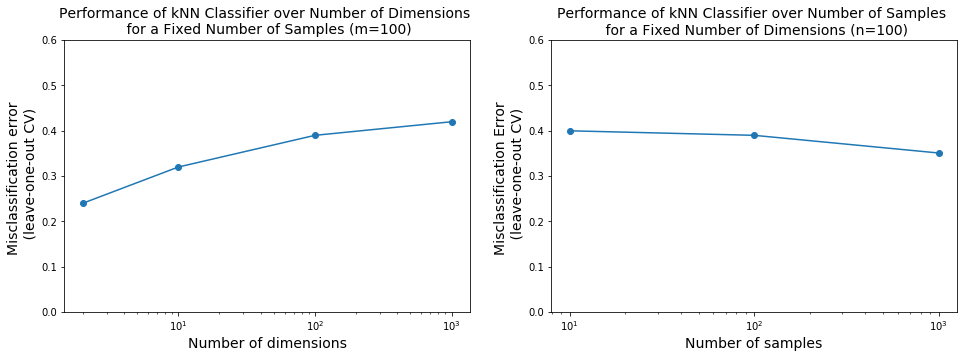

In [9]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.semilogx(N, errors_over_n, marker='o')
plt.ylim([0, 0.6])
plt.title('Performance of kNN Classifier over Number of Dimensions \n for a Fixed Number of Samples (m=100)', fontsize=14)
plt.ylabel('Misclassification error \n (leave-one-out CV)', fontsize=14)
plt.xlabel('Number of dimensions', fontsize=14)
plt.subplot(1, 2, 2)
plt.semilogx(M, errors_over_m, marker='o')
plt.ylim([0, 0.6])
plt.title('Performance of kNN Classifier over Number of Samples \n for a Fixed Number of Dimensions (n=100)', fontsize=14)
plt.ylabel('Misclassification Error \n (leave-one-out CV)', fontsize=14)
plt.xlabel('Number of samples', fontsize=14)